In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bqplot as bq
import folium
import ipywidgets
from ipywidgets import ToggleButtons, VBox, HTML
from bqplot import pyplot
from bqplot import *
import bqplot
from bqplot import *
from bqplot import Figure
from ipywidgets.embed import embed_minimal_html

In [174]:
data = pd.read_csv("201712-citibike-tripdata_cleaned.csv")

In [175]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,hour,day,distance,speed,age,dayOfWeek,start_date,end_date
0,256,2017-12-01 00:00:00,2017-12-01 00:04:17,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,262,Washington Park,40.691782,...,1981.0,1,0,1,0.403405,5.672882,36,4,1,1
1,325,2017-12-01 00:00:17,2017-12-01 00:05:43,470,W 20 St & 8 Ave,40.743453,-74.000040,490,8 Ave & W 33 St,40.751551,...,1992.0,1,0,1,0.644398,7.137951,25,4,1,1
2,967,2017-12-01 00:00:19,2017-12-01 00:16:26,347,Greenwich St & W Houston St,40.728846,-74.008591,504,1 Ave & E 16 St,40.732219,...,1992.0,1,0,1,1.429495,5.321800,25,4,1,1
3,125,2017-12-01 00:00:20,2017-12-01 00:02:26,3077,Stagg St & Union Ave,40.708771,-73.950953,3454,Leonard St & Maujer St,40.710369,...,1988.0,1,0,1,0.231877,6.678067,29,4,1,1
4,451,2017-12-01 00:00:28,2017-12-01 00:08:00,368,Carmine St & 6 Ave,40.730386,-74.002150,326,E 11 St & 1 Ave,40.729538,...,1986.0,1,0,1,0.938194,7.488910,31,4,1,1


## By Gender

In [176]:
data["gender"].value_counts()

1    651548
2    194802
0     43617
Name: gender, dtype: int64

[Text(0,0,'Male'), Text(0,0,'Female'), Text(0,0,'Unkown')]

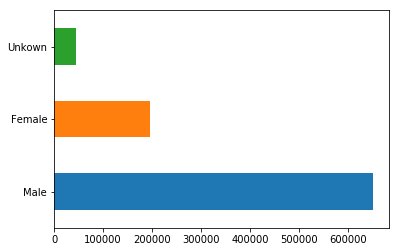

In [177]:
#bar plots by sex where 1 is male and 2 is female and 0 is not disclosed
ax = data['gender'].value_counts().plot(kind='barh')
xticks = [i for i in range(3)]
x_labels = ["Male","Female","Unkown"]
#ax.set_xticks(xticks)
ax.set_yticklabels(x_labels)

### Using interactivity

In [178]:
from bokeh.plotting import figure, output_file 
from bokeh.io import show,output_notebook
from bokeh.palettes import Plasma
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.models import FuncTickFormatter

In [179]:
y_range = [i for i in data["gender"].value_counts()]
print(y_range)

[651548, 194802, 43617]


In [180]:
x_range = ["Male","Female","Unknown"]

In [181]:
output_notebook()

Loading BokehJS ...

In [182]:
#output_file('bars.html')
source = ColumnDataSource(data=dict(gender=x_range, counts=y_range, color=Plasma[3]))
p = figure(x_range=x_range,y_range=(0,660000) ,plot_height=250, title="Gender Counts")
#p.vbar(x=x_range, top=y_range, width=0.9,color="firebrick")
p.vbar(x='gender', top='counts', width=0.9, color='color', legend="gender",source=source)
#p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_right"
p.xaxis.axis_label = "Gender"
p.yaxis.axis_label = "Counts"

show(p)

## User type Bar plots

In [183]:
data["usertype"].value_counts()

Subscriber    855573
Customer       34394
Name: usertype, dtype: int64

## Using same interactivity as above

In [184]:
#(Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
y_range = [i for i in data["usertype"].value_counts()]
x_range = ["Subscriber","Customer"]
p = figure(x_range=x_range,y_range=(0,900000) ,plot_height=250, title="UserType Counts")
p.vbar(x=x_range, top=y_range, width=0.9)
#p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_right"
p.xaxis.axis_label = "UserType"
p.yaxis.axis_label = "Counts"

show(p)

## Number of trips per day

In [185]:
data["starttime"] = pd.to_datetime(data['starttime'])
data["stoptime"] = pd.to_datetime(data["stoptime"])
data["hour"] = data["starttime"].map(lambda x: x.hour)

Text(0.5,0,'Days')

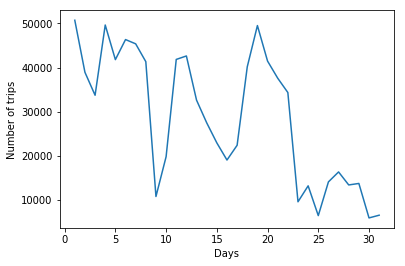

In [186]:
ax = data['starttime'].map(lambda t: t.day).value_counts().sort_index().plot()
ax.set_ylabel("Number of trips")
ax.set_xlabel("Days")

## Number of trips a station could have


Text(0,0.5,'Count of trips of each station')

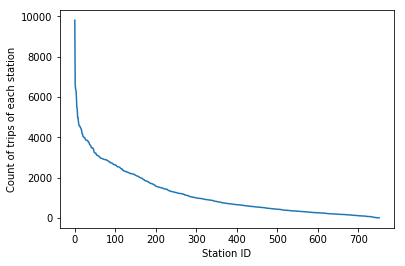

In [187]:
ax = data['start station id'].value_counts().reset_index(drop=True).plot()
ax.set_xlabel("Station ID")
ax.set_ylabel("Count of trips of each station")

We can see that a station can have as many as 10000 trips and close to 0 trips 

### Least active station id is

In [188]:
data[data['start station id'] == data['start station id'].value_counts().index[-1]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
887213,Morningside Dr & Amsterdam Ave,40.810285,-73.957365


### Most Actve station id is

In [189]:
data[data['start station id'] == data['start station id'].value_counts().index[0]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
119,Pershing Square North,40.751873,-73.977706


### Number of bikes leaving a station id

Text(0.5,0,'Count of bikes leaving station')

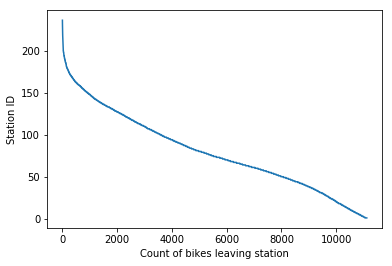

In [190]:
bikes = dict()
for bike_id in set(data['bikeid'].values):
    bikes.update({bike_id: len(data[data['bikeid'] == bike_id])})
bikes = pd.Series(bikes)
ax = bikes.sort_values(ascending=False).reset_index(drop=True).plot()
ax.set_ylabel("Station ID")
ax.set_xlabel("Count of bikes leaving station")

## Number of trips with a given end date (interactive graph)

In [191]:
data_start = data.groupby("start_date").agg("count")["bikeid"]

In [192]:

@ipywidgets.interact( end = (1, 31, 1))
def make_plot(end=1):
   
    x_sc=bqplot.LinearScale(min=1,max=31)
    y_sc=bqplot.LinearScale(min=5000,max=60000)
    lines = pyplot.plot(data_start[1:end], scales = {'x': x_sc, 'y': y_sc})
    ax_x = bqplot.Axis(scale = x_sc,label = 'Days')
    ax_y = bqplot.Axis(scale = y_sc, label = 'Number of rides each day', orientation = 'vertical')
    
    #br_sel = bqplot.interacts.BrushSelector(x_scale=x_sc, y_scale=y_sc, marks=[lines], color='red')
    #db_scat_brush = HTML(value='[]')
    #def brush_callback(change):
    #    db_scat_brush.value = str(br_sel.selected)
    
    #br_sel.observe(brush_callback, names=['brushing'])
    
    panzoom = bqplot.interacts.PanZoom(scales={'x': [x_sc], 'y': [y_sc]})

    fig = Figure(marks = [lines], axes = [ax_x, ax_y],interaction=panzoom)
    #print(fig)
    display(fig)
    #display(VBox([db_scat_brush, fig]))

#make_plot()

interactive(children=(IntSlider(value=1, description='end', max=31, min=1), Output()), _dom_classes=('widget-interact',))

## Using many selectors together for a more informed representation

In [193]:
x_sc=bqplot.LinearScale(min=1,max=31)
y_sc=bqplot.LinearScale(min=5000,max=60000)
lines = pyplot.plot(data_start[1:31], scales = {'x': x_sc, 'y': y_sc})
ax_x = bqplot.Axis(scale = x_sc,label = 'Days')
ax_y = bqplot.Axis(scale = y_sc, label = 'Number of rides each day', orientation = 'vertical')

fig = Figure(marks = [lines], axes = [ax_x, ax_y])

In [194]:
multi_sel = bqplot.interacts.MultiSelector(scale=x_sc, marks=[lines])
br_intsel = bqplot.interacts.BrushIntervalSelector(scale=x_sc, marks=[lines])
index_sel = bqplot.interacts.IndexSelector(scale=x_sc, marks=[lines])
int_sel = bqplot.interacts.FastIntervalSelector(scale=x_sc, marks=[lines])

hd = bqplot.interacts.HandDraw(lines=lines)
pz = bqplot.interacts.PanZoom(scales={'x': [x_sc], 'y': [y_sc]})

deb = HTML()
deb.value = '[]'


In [195]:
def test_callback(change):
    deb.value = str(change.new)
    
multi_sel.observe(test_callback, names=['selected'])
br_intsel.observe(test_callback, names=['selected'])
index_sel.observe(test_callback, names=['selected'])
int_sel.observe(test_callback, names=['selected'])

In [196]:
from collections import OrderedDict
from traitlets import link

selection_interacts = ToggleButtons(options=OrderedDict([('HandDraw1', hd), ('PanZoom', pz), 
                                                       ('FastIntervalSelector', int_sel), ('IndexSelector', index_sel),
                                                       ('BrushIntervalSelector', br_intsel), ('MultiSelector', multi_sel),
                                                       ('None', None)]))

link((selection_interacts, 'value'), (fig, 'interaction'))
VBox([deb, fig, selection_interacts], align_self='stretch')

VBox(children=(HTML(value='[]'), Figure(axes=[Axis(label='Days', scale=LinearScale(max=31.0, min=1.0)), Axis(label='Number of rides each day', orientation='vertical', scale=LinearScale(max=60000.0, min=5000.0))], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, interaction=HandDraw(lines=Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(max=31.0, min=1.0), 'y': LinearScale(max=60000.0, min=5000.0)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), y=array([38923, 33728, 49630, 41792, 46335, 45367, 41330, 10804, 19815,
       41838, 42620, 32623, 27495, 22944, 19060, 22403, 40168, 49503,
       41463, 37592, 34341,  9608, 13216,  6479, 14113, 16365, 13420,
       13759,  5956,  6569], dtype=int64)), max_x=None, min_x=None), layout=Layout(min_width='125px'), marks=[Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(max=31.0, min=1.0), 'y': LinearScale(max=60000.0, min=5000.0)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), y=array([38923, 33728, 49630, 41792, 46335, 45367, 41330, 10804, 19815,
       41838, 42620, 32623, 27495, 22944, 19060, 22403, 40168, 49503,
       41463, 37592, 34341,  9608, 13216,  6479, 14113, 16365, 13420,
       13759,  5956,  6569], dtype=int64))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0)), ToggleButtons(options=OrderedDict([('HandDraw1', HandDraw(lines=Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(max=31.0, min=1.0), 'y': LinearScale(max=60000.0, min=5000.0)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), y=array([38923, 33728, 49630, 41792, 46335, 45367, 41330, 10804, 19815,
       41838, 42620, 32623, 27495, 22944, 19060, 22403, 40168, 49503,
       41463, 37592, 34341,  9608, 13216,  6479, 14113, 16365, 13420,
       13759,  5956,  6569], dtype=int64)), max_x=None, min_x=None)), ('PanZoom', PanZoom(scales={'x': [LinearScale(max=31.0, min=1.0)], 'y': [LinearScale(max=60000.0, min=5000.0)]})), ('FastIntervalSelector', FastIntervalSelector(marks=[Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(max=31.0, min=1.0), 'y': LinearScale(max=60000.0, min=5000.0)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), y=array([38923, 33728, 49630, 41792, 46335, 45367, 41330, 10804, 19815,
       41838, 42620, 32623, 27495, 22944, 19060, 22403, 40168, 49503,
       41463, 37592, 34341,  9608, 13

In [197]:
val1=data.groupby(["gender","age"])["distance"].agg(["sum"]).unstack()["sum"]

In [198]:
val1

age,16,17,18,19,20,21,22,23,24,25,...,105,107,110,116,117,118,123,128,130,132
gender,,,,,,,,,,,,,,,,,,,,,
0,35.278213,45.698581,0.000000,21.717285,10.010644,94.087140,85.378751,38.204802,66.300503,88.567623,...,33.636085,NaN,NaN,NaN,27.553472,NaN,NaN,NaN,68.930097,30.041431
1,472.094409,1138.184421,1926.117767,2941.538916,3383.435412,4215.337962,6759.864625,10830.864087,17257.738364,19602.501831,...,0.973827,4.666283,3.693244,31.273602,235.283251,19.996648,16.30941,NaN,1.568078,NaN
2,96.172638,157.518252,292.697217,821.782792,1402.069294,1908.668304,3074.006428,4020.413723,6976.723388,7864.477165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.725395,NaN,NaN


In [199]:
val2=data.groupby(["gender","age"])["tripduration"].agg(["sum"]).unstack()["sum"]

In [200]:
val2

age,16,17,18,19,20,21,22,23,24,25,...,105,107,110,116,117,118,123,128,130,132
gender,,,,,,,,,,,,,,,,,,,,,
0,20538.0,39581.0,8185.0,29525.0,5850.0,58149.0,50754.0,22886.0,44189.0,71655.0,...,17088.0,NaN,NaN,NaN,17507.0,NaN,NaN,NaN,39903.0,22210.0
1,318860.0,1210569.0,1399957.0,2429278.0,3603517.0,3029321.0,5112564.0,7165647.0,11610990.0,14918853.0,...,464.0,3036.0,2013.0,13682.0,142589.0,11529.0,12388.0,NaN,925.0,NaN
2,115510.0,182325.0,264670.0,629233.0,1088497.0,1841833.0,2212277.0,2932859.0,5330430.0,5466865.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1115.0,NaN,NaN


In [201]:
val1 = val1.dropna(axis=1)
val2 = val2.dropna(axis=1)

In [202]:
val3 = val1 * (60*60)/val2

In [203]:
val3

age,16,17,18,19,20,21,22,23,24,25,...,61,63,65,66,67,68,69,71,75,78
gender,,,,,,,,,,,,,,,,,,,,,
0,6.183736,4.156411,0.000000,2.648001,6.160396,5.824927,6.055946,6.009669,5.401385,4.449703,...,5.076913,3.969813,5.644465,5.753230,5.519474,2.641929,5.479724,4.259578,5.382464,6.201771
1,5.330050,3.384742,4.953026,4.359131,3.380133,5.009445,4.759943,5.441394,5.350780,4.730190,...,5.217471,4.895398,4.658356,4.822195,4.538806,4.640921,4.580364,4.370272,3.458281,4.641755
2,2.997329,3.110192,3.981222,4.701626,4.637082,3.730635,5.002277,4.934942,4.711853,5.178858,...,4.410788,4.656008,4.439216,4.582311,4.596481,5.109243,3.746416,4.052697,4.170379,2.929598


## Distance covered by age and gender

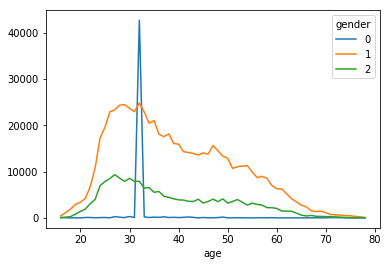

In [204]:
val=data.groupby(["age","gender"]).sum()['distance'].unstack().dropna()
#print(val)
val.plot()

## Average biker speed by age and gender

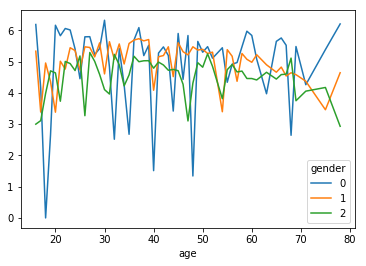

In [205]:
val1=data.groupby(["age","gender"]).sum()['tripduration'].unstack().dropna()
#print(val1)
val2=val*(60*60)/val1
val2.dropna().plot()

## Station wise activity and dates

In [206]:
import ipywidgets

In [207]:
data.head()
    

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,hour,day,distance,speed,age,dayOfWeek,start_date,end_date
0,256,2017-12-01 00:00:00,2017-12-01 00:04:17,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,262,Washington Park,40.691782,...,1981.0,1,0,1,0.403405,5.672882,36,4,1,1
1,325,2017-12-01 00:00:17,2017-12-01 00:05:43,470,W 20 St & 8 Ave,40.743453,-74.000040,490,8 Ave & W 33 St,40.751551,...,1992.0,1,0,1,0.644398,7.137951,25,4,1,1
2,967,2017-12-01 00:00:19,2017-12-01 00:16:26,347,Greenwich St & W Houston St,40.728846,-74.008591,504,1 Ave & E 16 St,40.732219,...,1992.0,1,0,1,1.429495,5.321800,25,4,1,1
3,125,2017-12-01 00:00:20,2017-12-01 00:02:26,3077,Stagg St & Union Ave,40.708771,-73.950953,3454,Leonard St & Maujer St,40.710369,...,1988.0,1,0,1,0.231877,6.678067,29,4,1,1
4,451,2017-12-01 00:00:28,2017-12-01 00:08:00,368,Carmine St & 6 Ave,40.730386,-74.002150,326,E 11 St & 1 Ave,40.729538,...,1986.0,1,0,1,0.938194,7.488910,31,4,1,1


In [208]:
loc1 = data.groupby("start station id").first()
location = loc1.loc[:,["start station longitude","start station latitude","start station name"]]

In [209]:
departure=data.groupby("start station id").count().iloc[:,[0]]
departure.columns=["Counts of Departure"]
#print(type(departure))
arrival= data.groupby("end station id").count().iloc[:,[0]]
arrival.columns=["Counts of Arrival"]
#print(type(arrival))
#joining arrival and departure
trip = departure.join(location).join(arrival)

In [210]:
trip.head()

,Counts of Departure,start station longitude,start station latitude,start station name,Counts of Arrival
start station id,,,,,
72,1764,-73.993929,40.767272,W 52 St & 11 Ave,1770
79,1306,-74.006667,40.719116,Franklin St & W Broadway,1405
82,226,-74.000165,40.711174,St James Pl & Pearl St,252
83,964,-73.976323,40.683826,Atlantic Ave & Fort Greene Pl,977
119,225,-73.978034,40.696089,Park Ave & St Edwards St,245


In [211]:
loc1.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,birth year,gender,hour,day,distance,speed,age,dayOfWeek,start_date,end_date
start station id,,,,,,,,,,,,,,,,,,,,,
72,911,2017-12-01 02:13:09,2017-12-01 02:28:20,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,...,1973.0,1,2,1,1.257704,4.970069,44,4,1,1
79,132,2017-12-01 01:13:29,2017-12-01 01:15:42,Franklin St & W Broadway,40.719116,-74.006667,249,Harrison St & Hudson St,40.718710,-74.009001,...,1960.0,1,1,1,0.125420,3.420541,57,4,1,1
82,256,2017-12-12 18:49:50,2017-12-12 18:54:07,St James Pl & Pearl St,40.711174,-74.000165,408,Market St & Cherry St,40.710762,-73.994004,...,1970.0,1,18,12,0.323969,4.555821,47,1,12,12
83,206,2017-12-01 06:52:12,2017-12-01 06:55:39,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,274,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,...,1956.0,2,6,1,0.214517,3.748839,61,4,1,1
119,1309,2017-12-01 07:42:50,2017-12-01 08:04:40,Park Ave & St Edwards St,40.696089,-73.978034,312,Allen St & Stanton St,40.722055,-73.989111,...,1955.0,1,7,1,1.885636,5.185859,62,4,1,1


In [212]:
#data["end station id"]
loc2 = data.groupby(["start station id","end station id"]).first()
loc2.head()

tripduration           starttime  \
start station id end station id                                     
72               72                      1910 2017-12-01 12:13:52   
                 79                      1523 2017-12-04 09:06:30   
                 127                     1356 2017-12-01 09:29:57   
                 128                     1232 2017-12-02 14:42:59   
                 146                     1817 2017-12-04 15:21:21   

                                           stoptime start station name  \
start station id end station id                                          
72               72             2017-12-01 12:45:42   W 52 St & 11 Ave   
                 79             2017-12-04 09:31:53   W 52 St & 11 Ave   
                 127            2017-12-01 09:52:33   W 52 St & 11 Ave   
                 128            2017-12-02 15:03:31   W 52 St & 11 Ave   
                 146            2017-12-04 15:51:39   W 52 St & 11 Ave   

                                 start station latitude  \
start station id end station id                           
72               72                           40.767272   
                 79                           40.767272   
                 127                          40.767272   
                 128                          40.767272   
                 146                          40.767272   

                                 start station longitude  \
start station id end station id                            
72               72                           -73.993929   
                 79                           -73.993929   
                 127                          -73.993929   
                 128                          -73.993929   
                 146                          -73.993929   

                                         end station name  \
start station id end station id                             
72               72                      W 52 St & 11 Ave   
                 79              Franklin St & W Broadway   
                 127                Barrow St & Hudson St   
                 128             MacDougal St & Prince St   
                 146                 Hudson St & Reade St   

                                 end station latitude  end station longitude  \
start station id end station id                                                
72               72                         40.767272             -73.993929   
                 79                         40.719116             -74.006667   
                 127                        40.731724             -74.006744   
                 128                        40.727103             -74.002971   
                 146                        40.716250             -74.009106   

                                 bikeid    ...    birth year  gender  hour  \
start station id end station id            ...                               
72               72               33359    ...        1971.0       1    12   
                 79               30945    ...        1988.0       1     9   
                 127              14955    ...        1982.0       1     9   
                 128              30246    ...        1980.0       1    14   
                 146              32618    ...        1966.0       1    15   

                                 day  distance     speed  age  dayOfWeek  \
start station id end station id                                            
72               72                1  0.000000  0.000000   46          4   
                 79                4  3.393667  8.021800   29          0   
                 127               1  2.546234  6.759912   35          4   
                 128               2  2.815691  8.227668   37          5   
                 146               4  3.613929  7.160234   51          0   

                                 start_date  end_date  
start station id end station id                        
72            

In [213]:
loc3 = data.groupby(["start station id","hour"]).first()

In [214]:
loc3.head()

tripduration           starttime            stoptime  \
start station id hour                                                         
72               0             1015 2017-12-04 00:54:05 2017-12-04 01:11:00   
                 1              587 2017-12-02 01:43:05 2017-12-02 01:52:53   
                 2              911 2017-12-01 02:13:09 2017-12-01 02:28:20   
                 3             1887 2017-12-10 03:10:40 2017-12-10 03:42:08   
                 4              345 2017-12-01 04:03:46 2017-12-01 04:09:31   

                      start station name  start station latitude  \
start station id hour                                              
72               0      W 52 St & 11 Ave               40.767272   
                 1      W 52 St & 11 Ave               40.767272   
                 2      W 52 St & 11 Ave               40.767272   
                 3      W 52 St & 11 Ave               40.767272   
                 4      W 52 St & 11 Ave               40.767272   

                       start station longitude  end station id  \
start station id hour                                            
72               0                  -73.993929             345   
                 1                  -73.993929             529   
                 2                  -73.993929             379   
                 3                  -73.993929             379   
                 4                  -73.993929             450   

                      end station name  end station latitude  \
start station id hour                                          
72               0     W 13 St & 6 Ave             40.736494   
                 1     W 42 St & 8 Ave             40.757570   
                 2     W 31 St & 7 Ave             40.749156   
                 3     W 31 St & 7 Ave             40.749156   
                 4     W 49 St & 8 Ave             40.762272   

                       end station longitude    ...       usertype birth year  \
start station id hour                           ...                             
72               0                -73.997044    ...     Subscriber     1982.0   
                 1                -73.990985    ...     Subscriber     1988.0   
                 2                -73.991600    ...     Subscriber     1973.0   
                 3                -73.991600    ...     Subscriber     1973.0   
                 4                -73.987882    ...     Subscriber     1994.0   

                       gender  day  distance     speed  age  dayOfWeek  \
start station id hour                                                    
72               0          1    4  2.132935  7.565091   35          0   
                 1          1    2  0.687878  4.218675   29          5   
                 2          1    1  1.257704  4.970069   44          4   
                 3          1   10  1.257704  2.399434   44          6   
                 4          2    1  0.468521  4.888914   23          4   

                       start_date  end_date  
start station id hour                        
72               0              4         4  
                 1              2         2  
                 2              1         1  
                 3             10        10  
                 4              1         1  

[5 rows x 21 columns]

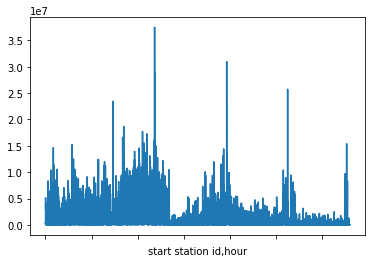

In [215]:
loc3 = data.groupby(["start station id","hour"]).sum()["bikeid"].plot()

In [216]:
loc3 = data.groupby(["start station id","hour"]).first()

In [217]:
val = data.groupby(["start station id"]).first()["hour"]

In [218]:
val = data[(data["start station id"]==72) & (data["end station id"]==379)]

In [219]:
val.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,hour,day,distance,speed,age,dayOfWeek,start_date,end_date
571,911,2017-12-01 02:13:09,2017-12-01 02:28:20,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,...,1973.0,1,2,1,1.257704,4.970069,44,4,1,1
44985,1148,2017-12-01 19:36:44,2017-12-01 19:55:52,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,...,1982.0,1,19,1,1.257704,3.944018,35,4,1,1
90828,1647,2017-12-03 02:26:09,2017-12-03 02:53:37,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,...,1973.0,1,2,3,1.257704,2.749079,44,6,3,3
123703,1600,2017-12-04 01:53:39,2017-12-04 02:20:19,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,...,1973.0,1,1,4,1.257704,2.829833,44,0,4,4
173321,1611,2017-12-05 01:13:33,2017-12-05 01:40:25,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,...,1973.0,1,1,5,1.257704,2.810511,44,1,5,5


In [220]:
bike = val.groupby(["hour"]).count().iloc[:,[11]].reset_index()

In [221]:
bike.head()

,hour,bikeid
0,0,2
1,1,7
2,2,7
3,3,3
4,8,1


In [222]:
from bokeh.plotting import figure, output_file, show

output_file("line.html")
p = figure(plot_width=400, plot_height=400)
p.line(bike["hour"], bike["bikeid"], line_width=2)
show(p)

In [223]:
start_stations = dict(zip(data["start station name"], data["start station id"]))
start_stations["None"] = None
end_stations = dict(zip(data["end station name"], data["end station id"]))
end_stations["None"]=None

## Number of trips per hour corresponding to start station

In [224]:
import ipywidgets
from ipywidgets import interact
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[
    ("Hour of the day: ", "$x"),
    ("Trips: ", "$y{00}"),
])
def f(start_station):
    val = data[data["start station id"]==start_station]
    bike = val.groupby(["hour"]).count().iloc[:,[11]].reset_index()
    output_file("line.html")
    p = figure(plot_width=400, plot_height=400,tools=[hover])
    p.line(bike["hour"], bike["bikeid"], line_width=2)
    show(p)

interact(f,start_station=start_stations)

interactive(children=(Dropdown(description='start_station', options={'DeKalb Ave & Hudson Ave': 324, 'W 20 St & 8 Ave': 470, 'Greenwich St & W Houston St': 347, 'Stagg St & Union Ave': 3077, 'Carmine St & 6 Ave': 368, '5 Ave & E 63 St': 3136, 'W 70 St & Amsterdam Ave': 3175, 'Greenwich Ave & Charles St': 383, 'E 10 St & 5 Ave': 280, 'Madison St & Montgomery St': 291, 'Canal St & Rutgers St': 307, 'W 13 St & 6 Ave': 345, 'Frederick Douglass Blvd & W 117 St': 3534, 'W 31 St & 7 Ave': 379, 'Allen St & Stanton St': 312, 'Broadway & W 29 St': 486, 'W 52 St & 9 Ave': 449, 'Broadway & W 60 St': 499, 'E 9 St & Avenue C': 394, 'E 15 St & 3 Ave': 297, 'Kent Ave & N 7 St': 3016, 'E 58 St & 3 Ave': 305, '9 Ave & W 45 St': 479, 'Little West St & 1 Pl': 2008, '5 Ave & E 78 St': 3143, 'E 24 St & Park Ave S': 491, '31 St & Astoria Blvd': 3516, 'Central Park W & W 96 St': 3295, 'LaGuardia Pl & W 3 St': 161, 'St Marks Pl & 1 Ave': 438, 'W 18 St & 6 Ave': 168, 'W 22 St & 8 Ave': 453, 'Boerum St & Broadway': 3071, 'Christopher St & Greenwich St': 358, 'Cooper Square & Astor Pl': 3263, 'Adelphi St & Myrtle Ave': 270, 'St James Pl & Oliver St': 308, 'E 11 St & 1 Ave': 326, '6 Ave & 9 St': 3304, 'E 12 St & 3 Ave': 483, 'Forsyth St & Broome St': 531, 'E 85 St & 3 Ave': 3147, '1 Ave & E 18 St': 2003, 'Bushwick Ave & Powers St': 3083, 'E 25 St & 2 Ave': 507, 'MacDougal St & Prince St': 128, 'S 3 St & Bedford Ave': 481, 'W 24 St & 7 Ave': 446, 'Lafayette Ave & Fort Greene Pl': 274, 'W 33 St & 7 Ave': 492, '14 St & 5 Ave': 3319, 'Broadway & W 56 St': 468, 'Grand St & Havemeyer St': 471, 'Meserole Ave & Manhattan Ave': 3110, '31 St & Thomson Ave': 3123, 'Greenpoint Ave & Manhattan Ave': 3113, 'E 20 St & 2 Ave': 461, 'Great Jones St': 229, 'E 27 St & 1 Ave': 2012, 'Bank St & Hudson St': 346, '6 Ave & Spring St': 3474, 'Greenwich Ave & 8 Ave': 284, 'University Pl & E 14 St': 382, '11 Ave & W 59 St': 530, 'W 67 St & Broadway': 3159, 'W 100 St & Broadway': 3350, '11 Ave & W 41 St': 478, 'Barrow St & Hudson St': 127, 'St Marks Pl & 2 Ave': 236, 'E 10 St & Avenue A': 445, 'E 17 St & Broadway': 497, '45 Rd & 11 St': 3125, 'Broadway & W 41 St': 465, 'Metropolitan Ave & Bedford Ave': 539, 'Centre St & Chambers St': 387, 'W 34 St & 11 Ave': 525, '31 St & Hoyt Ave N': 3517, 'W 49 St & 8 Ave': 450, 'W 41 St & 8 Ave': 477, 'Columbia St & Kane St': 3311, 'Sullivan St & Washington Sq': 336, 'W 84 St & Broadway': 3177, 'Macon St & Nostrand Ave': 437, 'W 45 St & 6 Ave': 3466, 'Scholes St & Manhattan Ave': 3076, 'W 13 St & 5 Ave': 253, 'Schermerhorn St & 3 Ave': 3455, 'Barclay St & Church St': 417, 'Catherine St & Monroe St': 2009, 'Liberty St & Broadway': 195, 'E 11 St & 2 Ave': 237, '31 St & 23 Ave': 3526, 'Graham Ave & Grand St': 3081, 'Centre St & Worth St': 386, 'Frederick Douglass Blvd & W 112 St': 3553, 'Grand St & Elizabeth St': 3435, 'Harrison St & Hudson St': 249, 'Pacific St & Nevins St': 3412, 'Pershing Square North': 519, 'Amsterdam Ave & W 79 St': 3360, 'MacDougal St & Washington Sq': 252, '8 Ave & W 33 St': 490, 'Broadway & W 49 St': 173, '44 Dr & 21 St': 3615, 'E 31 St & 3 Ave': 476, 'Huron St & Franklin St': 3116, 'Bedford Ave & Nassau Ave': 3107, 'Broadway & E 14 St': 285, 'Lafayette Ave & St James Pl': 399, '2 Ave & E 31 St': 528, 'Central Park S & 6 Ave': 2006, 'Amsterdam Ave & W 73 St': 3167, '1 Ave & E 16 St': 504, 'Vernon Blvd & 50 Ave': 3119, 'Pike St & Monroe St': 331, 'Clinton Ave & Flushing Ave': 343, 'Mercer St & Bleecker St': 3260, 'E 51 St & 1 Ave': 454, 'W 27 St & 7 Ave': 442, 'Lawrence St & Willoughby St': 323, 'Fulton St & Rockwell Pl': 243, 'E 53 St & Madison Ave': 456, 'Montrose Ave & Bushwick Ave': 3074, 'W 4 St & 7 Ave S': 380, '3 Ave & E 62 St': 3134, 'Washington Pl & 6 Ave': 369, 'Myrtle Ave & Lewis Ave': 3064, 'Willoughby Ave & Hall St': 244, 'Fulton St & Broadway': 319, 'Rogers Ave & Sterling St': 3604, 'E 47 St & 1 Ave': 516, 'Central Park North & Adam Clayton Powell Blvd': 3374, 'Avenue D & E 8 St': 266, 'Court St & State St': 340

<function __main__.f>

In [225]:
import ipywidgets
from ipywidgets import interact
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[
    ("Hour of the day: ", "$x"),
    ("Trips: ", "$y{00}"),
])
def f(start_station,end_station):
    val = data[(data["start station id"]==start_station) & (data["end station id"]==end_station)]
    bike = val.groupby(["hour"]).count().iloc[:,[11]].reset_index()
    output_file("line.html")
    p = figure(plot_width=400, plot_height=400,tools=[hover])
    p.line(bike["hour"], bike["bikeid"], line_width=2)
    show(p)

interact(f,start_station=start_stations,end_station=end_stations)

interactive(children=(Dropdown(description='start_station', options={'DeKalb Ave & Hudson Ave': 324, 'W 20 St & 8 Ave': 470, 'Greenwich St & W Houston St': 347, 'Stagg St & Union Ave': 3077, 'Carmine St & 6 Ave': 368, '5 Ave & E 63 St': 3136, 'W 70 St & Amsterdam Ave': 3175, 'Greenwich Ave & Charles St': 383, 'E 10 St & 5 Ave': 280, 'Madison St & Montgomery St': 291, 'Canal St & Rutgers St': 307, 'W 13 St & 6 Ave': 345, 'Frederick Douglass Blvd & W 117 St': 3534, 'W 31 St & 7 Ave': 379, 'Allen St & Stanton St': 312, 'Broadway & W 29 St': 486, 'W 52 St & 9 Ave': 449, 'Broadway & W 60 St': 499, 'E 9 St & Avenue C': 394, 'E 15 St & 3 Ave': 297, 'Kent Ave & N 7 St': 3016, 'E 58 St & 3 Ave': 305, '9 Ave & W 45 St': 479, 'Little West St & 1 Pl': 2008, '5 Ave & E 78 St': 3143, 'E 24 St & Park Ave S': 491, '31 St & Astoria Blvd': 3516, 'Central Park W & W 96 St': 3295, 'LaGuardia Pl & W 3 St': 161, 'St Marks Pl & 1 Ave': 438, 'W 18 St & 6 Ave': 168, 'W 22 St & 8 Ave': 453, 'Boerum St & Broadway': 3071, 'Christopher St & Greenwich St': 358, 'Cooper Square & Astor Pl': 3263, 'Adelphi St & Myrtle Ave': 270, 'St James Pl & Oliver St': 308, 'E 11 St & 1 Ave': 326, '6 Ave & 9 St': 3304, 'E 12 St & 3 Ave': 483, 'Forsyth St & Broome St': 531, 'E 85 St & 3 Ave': 3147, '1 Ave & E 18 St': 2003, 'Bushwick Ave & Powers St': 3083, 'E 25 St & 2 Ave': 507, 'MacDougal St & Prince St': 128, 'S 3 St & Bedford Ave': 481, 'W 24 St & 7 Ave': 446, 'Lafayette Ave & Fort Greene Pl': 274, 'W 33 St & 7 Ave': 492, '14 St & 5 Ave': 3319, 'Broadway & W 56 St': 468, 'Grand St & Havemeyer St': 471, 'Meserole Ave & Manhattan Ave': 3110, '31 St & Thomson Ave': 3123, 'Greenpoint Ave & Manhattan Ave': 3113, 'E 20 St & 2 Ave': 461, 'Great Jones St': 229, 'E 27 St & 1 Ave': 2012, 'Bank St & Hudson St': 346, '6 Ave & Spring St': 3474, 'Greenwich Ave & 8 Ave': 284, 'University Pl & E 14 St': 382, '11 Ave & W 59 St': 530, 'W 67 St & Broadway': 3159, 'W 100 St & Broadway': 3350, '11 Ave & W 41 St': 478, 'Barrow St & Hudson St': 127, 'St Marks Pl & 2 Ave': 236, 'E 10 St & Avenue A': 445, 'E 17 St & Broadway': 497, '45 Rd & 11 St': 3125, 'Broadway & W 41 St': 465, 'Metropolitan Ave & Bedford Ave': 539, 'Centre St & Chambers St': 387, 'W 34 St & 11 Ave': 525, '31 St & Hoyt Ave N': 3517, 'W 49 St & 8 Ave': 450, 'W 41 St & 8 Ave': 477, 'Columbia St & Kane St': 3311, 'Sullivan St & Washington Sq': 336, 'W 84 St & Broadway': 3177, 'Macon St & Nostrand Ave': 437, 'W 45 St & 6 Ave': 3466, 'Scholes St & Manhattan Ave': 3076, 'W 13 St & 5 Ave': 253, 'Schermerhorn St & 3 Ave': 3455, 'Barclay St & Church St': 417, 'Catherine St & Monroe St': 2009, 'Liberty St & Broadway': 195, 'E 11 St & 2 Ave': 237, '31 St & 23 Ave': 3526, 'Graham Ave & Grand St': 3081, 'Centre St & Worth St': 386, 'Frederick Douglass Blvd & W 112 St': 3553, 'Grand St & Elizabeth St': 3435, 'Harrison St & Hudson St': 249, 'Pacific St & Nevins St': 3412, 'Pershing Square North': 519, 'Amsterdam Ave & W 79 St': 3360, 'MacDougal St & Washington Sq': 252, '8 Ave & W 33 St': 490, 'Broadway & W 49 St': 173, '44 Dr & 21 St': 3615, 'E 31 St & 3 Ave': 476, 'Huron St & Franklin St': 3116, 'Bedford Ave & Nassau Ave': 3107, 'Broadway & E 14 St': 285, 'Lafayette Ave & St James Pl': 399, '2 Ave & E 31 St': 528, 'Central Park S & 6 Ave': 2006, 'Amsterdam Ave & W 73 St': 3167, '1 Ave & E 16 St': 504, 'Vernon Blvd & 50 Ave': 3119, 'Pike St & Monroe St': 331, 'Clinton Ave & Flushing Ave': 343, 'Mercer St & Bleecker St': 3260, 'E 51 St & 1 Ave': 454, 'W 27 St & 7 Ave': 442, 'Lawrence St & Willoughby St': 323, 'Fulton St & Rockwell Pl': 243, 'E 53 St & Madison Ave': 456, 'Montrose Ave & Bushwick Ave': 3074, 'W 4 St & 7 Ave S': 380, '3 Ave & E 62 St': 3134, 'Washington Pl & 6 Ave': 369, 'Myrtle Ave & Lewis Ave': 3064, 'Willoughby Ave & Hall St': 244, 'Fulton St & Broadway': 319, 'Rogers Ave & Sterling St': 3604, 'E 47 St & 1 Ave': 516, 'Central Park North & Adam Clayton Powell Blvd': 3374, 'Avenue D & E 8 St': 266, 'Court St & State St': 340

<function __main__.f>

In [226]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,hour,day,distance,speed,age,dayOfWeek,start_date,end_date
0,256,2017-12-01 00:00:00,2017-12-01 00:04:17,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,262,Washington Park,40.691782,...,1981.0,1,0,1,0.403405,5.672882,36,4,1,1
1,325,2017-12-01 00:00:17,2017-12-01 00:05:43,470,W 20 St & 8 Ave,40.743453,-74.000040,490,8 Ave & W 33 St,40.751551,...,1992.0,1,0,1,0.644398,7.137951,25,4,1,1
2,967,2017-12-01 00:00:19,2017-12-01 00:16:26,347,Greenwich St & W Houston St,40.728846,-74.008591,504,1 Ave & E 16 St,40.732219,...,1992.0,1,0,1,1.429495,5.321800,25,4,1,1
3,125,2017-12-01 00:00:20,2017-12-01 00:02:26,3077,Stagg St & Union Ave,40.708771,-73.950953,3454,Leonard St & Maujer St,40.710369,...,1988.0,1,0,1,0.231877,6.678067,29,4,1,1
4,451,2017-12-01 00:00:28,2017-12-01 00:08:00,368,Carmine St & 6 Ave,40.730386,-74.002150,326,E 11 St & 1 Ave,40.729538,...,1986.0,1,0,1,0.938194,7.488910,31,4,1,1
